In [6]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

file_path = '/content/sample_data/Datos Preparcial.csv'

try:
  df = pd.read_csv(file_path)
  print("Archivo cargado correctamente.")
  print(df.head())
except FileNotFoundError:
  print(f"Error: El archivo no se encontró en la ruta especificada: {file_path}")
except pd.errors.ParserError:
    print(f"Error: No se pudo analizar el archivo. Asegúrate de que sea un archivo válido (CSV, Excel, etc.) y que la ruta sea correcta.")
except Exception as e:
  print(f"Ocurrió un error inesperado: {e}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Archivo cargado correctamente.
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

**Respuesta preguntas**

**Pregunta 1: Análisis Exploratorio de Datos (EDA)**

1. **Inspección inicial y limpieza de datos:**
    * **Descripción general:** Utilizaría `df.info()` para obtener un resumen de los datos, incluyendo el tipo de datos de cada columna, la cantidad de valores no nulos y el uso de memoria.  `df.describe()` mostrará estadísticas descriptivas (media, desviación estándar, cuartiles, etc.) para las columnas numéricas.  Esto me permitirá identificar rápidamente si hay valores faltantes o inconsistencias en los tipos de datos.
    * **Valores faltantes:** Detectar valores faltantes (`df.isnull().sum()`) y decidir cómo tratarlos.  Las opciones incluyen: eliminación de filas o columnas con muchos valores faltantes, imputación con la media, mediana, moda u otro método más sofisticado (interpolación).  
    * **Tipos de datos:** Verificar si los tipos de datos son correctos.  Por ejemplo, convertir columnas de texto que deberían ser numéricas al tipo adecuado (`pd.to_numeric()`, teniendo cuidado con posibles errores), o convertir fechas al formato correcto (`pd.to_datetime()`).
    * **Valores atípicos (outliers):** Identificaría valores atípicos utilizando diagramas de caja (`df.boxplot()`), histogramas (`df.hist()`), o calculando puntuaciones z.  Evaluaría si los outliers son errores o datos válidos y decidiría si eliminarlos, transformarlos o dejarlos como están.
    * **Duplicados:** Identificar y eliminar filas duplicadas usando `df.drop_duplicates()`.


2. **Análisis univariado:**
    * **Distribuciones:**  Utilizaría histogramas, diagramas de densidad y diagramas de caja para visualizar la distribución de cada variable. Esto me ayudaría a entender la forma, la centralidad y la dispersión de los datos.
    * **Medidas de resumen:** Calcularía la media, mediana, desviación estándar, percentiles, etc., para cada variable numérica para cuantificar las distribuciones.
    * **Frecuencias:** Para las variables categóricas, calcularía las frecuencias de cada categoría (`df['nombre_columna'].value_counts()`) y las visualizaría con diagramas de barras.


3. **Análisis bivariado:**
    * **Relaciones entre variables:**  Usaría diagramas de dispersión (`df.plot.scatter()`) para variables numéricas y tablas de contingencia o gráficos de barras agrupadas para explorar las relaciones entre variables numéricas y categóricas.
    * **Correlaciones:** Calcularía la matriz de correlación (`df.corr()`) y la visualizaría con un mapa de calor para identificar las relaciones lineales entre las variables numéricas.
    * **Análisis de la distribución conjunta:**  Analizar cómo la distribución de una variable cambia según los valores de otra variable.


4. **Análisis multivariado:**
    * **Reducción de dimensionalidad:** Si hay muchas variables, podría utilizar técnicas de reducción de dimensionalidad como el Análisis de Componentes Principales (PCA) para visualizar los datos en un espacio de menor dimensión.
    * **Visualizaciones multidimensionales:** Técnicas como gráficos de pares, gráficos de dispersión en 3D, o métodos de proyección como t-SNE para obtener insights sobre la interacción entre varias variables.


**Herramientas:**

* **Pandas:** Para la manipulación y limpieza de datos.
* **NumPy:** Para operaciones numéricas.
* **Matplotlib y Seaborn:** Para la visualización de datos.
* **Scikit-learn:** Para las técnicas de reducción de dimensionalidad (PCA) y otros métodos de Machine Learning.

**Pregunta 2: Preprocesamiento de Datos**

Para tratar valores faltantes o atípicos (outliers) en el conjunto de datos, usaría una combinación de técnicas dependiendo del contexto y la naturaleza de los datos.

**Valores faltantes:**

* **Imputación:** Para valores faltantes numéricos, consideraría la imputación con la media, mediana o moda, o usaría métodos más sofisticados como la imputación por k-vecinos más cercanos (k-NN) o modelos de regresión para predecir valores faltantes basados en otras variables.  Para datos categóricos, la imputación con la moda o una nueva categoría ("Desconocido") sería apropiada.  La elección del método dependerá de la cantidad de valores faltantes y su impacto en el análisis posterior.
* **Eliminación:** Si la cantidad de valores faltantes es muy pequeña y están distribuidos aleatoriamente, se puede considerar la eliminación de filas o columnas con datos faltantes.  Sin embargo, esto no es recomendable si se pierde una cantidad significativa de información.


**Valores atípicos (outliers):**

* **Análisis descriptivo:** Utilizaría estadísticas descriptivas (como la media, mediana, desviación estándar, rango intercuartílico (IQR)) para identificar posibles valores atípicos y visualizarlos utilizando histogramas y diagramas de caja.
* **Eliminación:** Se podrían eliminar los valores atípicos si están claramente causados por errores de medición o entrada. Sin embargo, antes de eliminarlos, hay que analizar si estos representan un fenómeno real y su significado dentro del contexto del problema.
* **Transformación:** Aplicar transformaciones a los datos (logaritmo, raíz cuadrada, etc.) puede reducir el impacto de los valores atípicos en los análisis estadísticos y los modelos de machine learning.
* **Winsorizing o recorte:** Limitar los valores extremos a un cierto percentil (p.ej., el 1% o el 5%) puede ser una alternativa a la eliminación.


**Justificación:**

La elección de la técnica depende del tipo de dato (numérico o categórico), la cantidad de datos faltantes o atípicos, y la posible causa de estos.  Es importante considerar el impacto de cada técnica en los resultados del análisis.  Por ejemplo, eliminar valores atípicos podría sesgar la muestra y afectar la representatividad de los datos, mientras que la imputación incorrecta podría introducir ruido en el conjunto de datos.  Por lo tanto, se requiere un análisis cuidadoso y una justificación clara de cada decisión.


**Pregunta 3: Modelos de Clasificación**

Para predecir la probabilidad de que un cliente abandone el banco (variable "Exited"), que es una variable binaria (0 o 1), se debería utilizar un modelo de clasificación.  Dados los datos, un buen punto de partida sería un **modelo de Regresión Logística**.

**Ventajas:**

* **Interpretabilidad:** La regresión logística proporciona coeficientes para cada variable predictora, lo que permite interpretar la influencia de cada característica en la probabilidad de abandono. Esto es crucial para entender *por qué* un cliente podría abandonar el banco, lo que facilita la toma de decisiones y la implementación de estrategias de retención.
* **Eficiencia computacional:** Es un modelo relativamente sencillo y rápido de entrenar, lo que es una ventaja cuando se trabaja con grandes conjuntos de datos.
* **Buen punto de partida:**  Es un modelo robusto y a menudo sirve como línea base para comparar otros modelos más complejos.  Su simplicidad facilita su comprensión y  ajuste inicial.
* **Probabilidad de predicción:**  Proporciona una probabilidad de abandono para cada cliente, lo que permite establecer umbrales para clasificar a los clientes como propensos a abandonar o no.


**Desventajas:**

* **Asumción de linealidad:** La regresión logística asume una relación lineal entre las variables predictoras y el logaritmo de las probabilidades. Si esta suposición no se cumple, la precisión del modelo puede verse afectada. En la práctica, esto se puede mitigar mediante transformaciones de variables o la inclusión de términos de interacción.
* **Sensibilidad a valores atípicos:** Al igual que otros modelos lineales, la regresión logística puede ser sensible a valores atípicos.  Es importante realizar una limpieza y preprocesamiento adecuado de los datos para mitigar este problema.
* **Limitaciones en datos no lineales:** Si la relación entre las variables predictoras y la variable objetivo es altamente no lineal, la regresión logística puede no ser el mejor modelo. En estos casos, se podrían considerar modelos más complejos como máquinas de vectores de soporte (SVM), árboles de decisión, bosques aleatorios o redes neuronales.


En resumen, la regresión logística es un buen punto de partida debido a su interpretabilidad y eficiencia. Sin embargo, es importante evaluar su desempeño y considerar modelos alternativos si no se cumple su supuesto de linealidad o si el conjunto de datos presenta patrones no lineales.  Se recomienda comparar su rendimiento con otros modelos como los mencionados anteriormente (árboles de decisión, bosques aleatorios, SVM o redes neuronales), para determinar el que mejor se adapta a los datos y al objetivo de negocio.


**Pregunta 4: Desbalanceo de Clases**

El desbalanceo de clases ocurre cuando en un conjunto de datos para clasificación, una clase tiene significativamente más ejemplos que otras.  Por ejemplo, en un conjunto de datos para detectar fraudes con tarjetas de crédito, la mayoría de las transacciones serán legítimas (clase mayoritaria) y solo unas pocas serán fraudulentas (clase minoritaria).

Este desbalanceo es problemático para entrenar modelos de clasificación porque el modelo puede aprender a predecir la clase mayoritaria con alta precisión simplemente por su prevalencia, ignorando las características de la clase minoritaria.  Esto resulta en un modelo que tiene baja precisión para la clase minoritaria, lo cual puede ser crítico, especialmente si la clase minoritaria es la de mayor interés (como en el ejemplo de detección de fraudes, donde identificar los fraudes es la meta principal).

Para abordar el desbalanceo de clases, se pueden utilizar varias técnicas. Algunas de ellas son:

* **Sobremuestreo (Oversampling):** Consiste en aumentar la cantidad de ejemplos en la clase minoritaria.  SMOTE (Synthetic Minority Over-sampling Technique) es una técnica de sobremuestreo popular.  Crea nuevos ejemplos sintéticos de la clase minoritaria interpolando entre ejemplos existentes, lo que aumenta la diversidad de los datos de la clase minoritaria sin simplemente duplicar los ejemplos existentes.


* **Submuestreo (Undersampling):** Disminuye la cantidad de ejemplos en la clase mayoritaria.  Es menos común que el sobremuestreo ya que se puede perder información valiosa al descartar datos.

* **Cost-sensitive learning:**  Modifica el algoritmo de aprendizaje para asignar un costo mayor a los errores de clasificación de la clase minoritaria.  Esto le "enseña" al modelo a penalizar más fuertemente los errores en la clase menos frecuente.


* **Ensemble methods:** Métodos como bagging y boosting, pueden combinar varios modelos para mejorar la precisión en la clase minoritaria.



SMOTE es particularmente útil porque genera nuevos ejemplos sintéticos en lugar de simplemente replicar los existentes, lo que reduce el riesgo de sobreajuste (overfitting) al modelo. La elección del método más apropiado depende del conjunto de datos y del problema específico.


**Pregunta 5: Overfitting**

El *overfitting* (sobreajuste) en Machine Learning ocurre cuando un modelo se ajusta demasiado bien a los datos de entrenamiento, aprendiendo incluso el ruido y las particularidades específicas de esos datos.  Como resultado, el modelo funciona excelentemente en los datos de entrenamiento, pero su desempeño es pobre con nuevos datos (datos no vistos durante el entrenamiento).  Esencialmente, el modelo memoriza los datos de entrenamiento en lugar de aprender las relaciones generales subyacentes.

**Detectando el overfitting:**

El overfitting se detecta comparando el rendimiento del modelo en los datos de entrenamiento y en un conjunto de datos de prueba o validación independiente.  Si la diferencia en el desempeño es significativa (el modelo tiene mucha mejor precisión en el conjunto de entrenamiento que en el conjunto de prueba), es una clara señal de sobreajuste.  Otras señales incluyen:

* **Alta complejidad del modelo:** Modelos muy complejos con muchos parámetros tienen una mayor probabilidad de sobreajustarse.
* **Varianza alta:**  El modelo es muy sensible a pequeñas variaciones en los datos de entrenamiento.
* **Error de entrenamiento bajo, pero error de validación alto:** Una discrepancia grande entre estos dos errores indica overfitting.

**Medidas para evitar el overfitting:**

1. **Aumentar la cantidad de datos de entrenamiento:**  Más datos ayudan al modelo a generalizar mejor y reducir el impacto del ruido.

2. **Reducir la complejidad del modelo:** Simplificar el modelo (por ejemplo, reducir el número de capas en una red neuronal, disminuir la profundidad de un árbol de decisión, o usar regularización) puede ayudar a evitar el sobreajuste.

3. **Regularización:**  Agregar un término de penalización a la función de pérdida del modelo.  La regularización L1 (Lasso) y L2 (Ridge) son comunes.  Estas penalizaciones reducen el valor absoluto de los pesos del modelo, previniendo que algunos pesos tomen valores muy grandes que podrían llevar a sobreajuste.

4. **Validación cruzada:**  Dividir los datos en múltiples conjuntos de entrenamiento y prueba (o validación) para evaluar el modelo de manera más robusta.  K-fold cross-validation es una técnica común.

5. **Dropout (redes neuronales):** Desactivar aleatoriamente algunas neuronas durante el entrenamiento.  Esto fuerza a la red a aprender características más robustas y evita la dependencia excesiva de neuronas individuales.

6. **Early Stopping:** Monitorear el error de validación durante el entrenamiento y detener el proceso cuando el error de validación empieza a aumentar, incluso si el error de entrenamiento sigue disminuyendo.  Esto evita que el modelo siga aprendiendo el ruido de los datos de entrenamiento.

7. **Aumentar el ruido en los datos:** Añadir ruido aleatorio a los datos de entrenamiento puede obligar al modelo a aprender características más generales y menos sensibles al ruido.

8. **Data Augmentation:** Aumentar los datos de entrenamiento aplicando transformaciones aleatorias a las imágenes, textos, o cualquier otro tipo de datos (rotaciones, traslaciones, etc.)

Implementar estas medidas ayudará a crear un modelo con mejor capacidad de generalización, que se desempeñe bien no solo en los datos de entrenamiento, sino también en datos nuevos y no vistos.  La elección de las estrategias depende del problema, el modelo utilizado y las características del conjunto de datos.


**Solución Ejercicios**

In [10]:
numerical_cols = df.select_dtypes(include=['number'])

print("\n--- Análisis descriptivo de variables numéricas ---")
print(numerical_cols.describe())

print("\n--- Información adicional sobre las variables numéricas ---")
print(numerical_cols.info())


print("\n--- Correlación entre variables numéricas ---")
correlation_matrix = numerical_cols.corr()
correlation_matrix



--- Análisis descriptivo de variables numéricas ---
         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654     

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016140,-0.016957,0.009289,0.002360
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006203,-0.007293,-0.000865,-0.013076
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.026771,-0.027048,-0.012599,0.000077
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285296,0.283530,-0.000876,0.002222
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.013656,-0.013047,0.008663,-0.010196
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118577,0.119124,-0.002588,0.014608
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047611,-0.046357,-0.011394,-0.015330
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.006976,-0.007095,-0.000212,-0.011041
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156356,-0.154741,0.010236,-0.004983
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012490,0.012494,-0.013747,-0.001515


In [12]:
promedio_credit_score = df['CreditScore'].mean()
print(f"El promedio de la puntuación de crédito es: {promedio_credit_score}")

El promedio de la puntuación de crédito es: 650.5288


In [13]:
promedio_balance_abandonados = df[df['Exited'] == 1]['Balance'].mean()
print(f"El balance promedio de los clientes que abandonaron el banco es: {promedio_balance_abandonados}")

El balance promedio de los clientes que abandonaron el banco es: 91109.47600588812


In [14]:
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})

df = pd.get_dummies(df, columns=['Geography'], drop_first=True)

for col in df.select_dtypes(include=['number']):
  if df[col].isnull().any():
    df[col].fillna(df[col].mean(), inplace=True)

from sklearn.preprocessing import MinMaxScaler

numerical_cols = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [15]:
print("\n--- Correlation Analysis ---")
print("CreditScore vs. Balance:")
correlation_credit_balance = df['CreditScore'].corr(df['Balance'])
print(f"Correlation coefficient: {correlation_credit_balance}")

print("\nAge vs. EstimatedSalary:")
correlation_age_salary = df['Age'].corr(df['EstimatedSalary'])
print(f"Correlation coefficient: {correlation_age_salary}")

print("\nTenure vs. NumOfProducts:")
correlation_tenure_products = df['Tenure'].corr(df['NumOfProducts'])
print(f"Correlation coefficient: {correlation_tenure_products}")

print("\n--- Discussion ---")

if abs(correlation_credit_balance) > 0.5:
    print("There is a strong correlation between CreditScore and Balance.")
elif abs(correlation_credit_balance) > 0.3:
    print("There is a moderate correlation between CreditScore and Balance.")
else:
    print("There is a weak correlation between CreditScore and Balance.")

if abs(correlation_age_salary) > 0.5:
    print("There is a strong correlation between Age and EstimatedSalary.")
elif abs(correlation_age_salary) > 0.3:
    print("There is a moderate correlation between Age and EstimatedSalary.")
else:
    print("There is a weak correlation between Age and EstimatedSalary.")

if abs(correlation_tenure_products) > 0.5:
    print("There is a strong correlation between Tenure and NumOfProducts.")
elif abs(correlation_tenure_products) > 0.3:
    print("There is a moderate correlation between Tenure and NumOfProducts.")
else:
    print("There is a weak correlation between Tenure and NumOfProducts.")

print("\nImpact on a predictive model:")
print("Strong correlations can indicate multicollinearity, which can affect the stability and interpretability of the model.")
print("Feature engineering might be necessary to address strong correlations by combining correlated features or removing redundant features.")



--- Correlation Analysis ---
CreditScore vs. Balance:
Correlation coefficient: 0.006268381616008735

Age vs. EstimatedSalary:
Correlation coefficient: -0.007201042376657296

Tenure vs. NumOfProducts:
Correlation coefficient: 0.013443755460747329

--- Discussion ---
There is a weak correlation between CreditScore and Balance.
There is a weak correlation between Age and EstimatedSalary.
There is a weak correlation between Tenure and NumOfProducts.

Impact on a predictive model:
Strong correlations can indicate multicollinearity, which can affect the stability and interpretability of the model.
Feature engineering might be necessary to address strong correlations by combining correlated features or removing redundant features.


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE
import warnings
import pandas as pd

warnings.filterwarnings('ignore')

X = df.drop(['Exited', 'Surname'], axis=1)  # Exclude 'Surname'

for col in X.select_dtypes(include=['object']).columns:
    X = pd.get_dummies(X, columns=[col], drop_first=True)

y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [19]:
logreg = LogisticRegression()
logreg.fit(X_train_resampled, y_train_resampled)
y_pred_logreg = logreg.predict_proba(X_test)[:, 1]
roc_auc_logreg = roc_auc_score(y_test, y_pred_logreg)
print(f"ROC AUC for Logistic Regression: {roc_auc_logreg}")

dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train_resampled, y_train_resampled)
y_pred_dtree = dtree.predict_proba(X_test)[:, 1]
roc_auc_dtree = roc_auc_score(y_test, y_pred_dtree)
print(f"ROC AUC for Decision Tree: {roc_auc_dtree}")

# Compare models
print("\nModel Comparison:")
if roc_auc_logreg > roc_auc_dtree:
    print("Logistic Regression performs better based on ROC AUC.")
elif roc_auc_dtree > roc_auc_logreg:
    print("Decision Tree performs better based on ROC AUC.")
else:
    print("Both models have the same ROC AUC.")


ROC AUC for Logistic Regression: 0.8882734727678369
ROC AUC for Decision Tree: 0.9962109156663516

Model Comparison:
Decision Tree performs better based on ROC AUC.



--- Logistic Regression Evaluation ---
              precision    recall  f1-score   support

           0       0.91      0.92      0.91      1607
           1       0.65      0.63      0.64       393

    accuracy                           0.86      2000
   macro avg       0.78      0.77      0.78      2000
weighted avg       0.86      0.86      0.86      2000



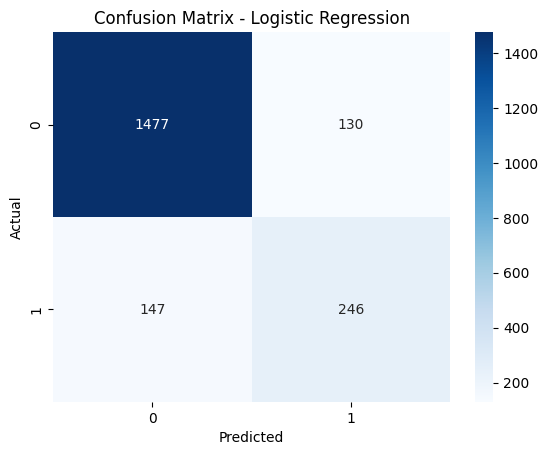


--- Decision Tree Evaluation ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       0.99      0.99      0.99       393

    accuracy                           1.00      2000
   macro avg       0.99      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



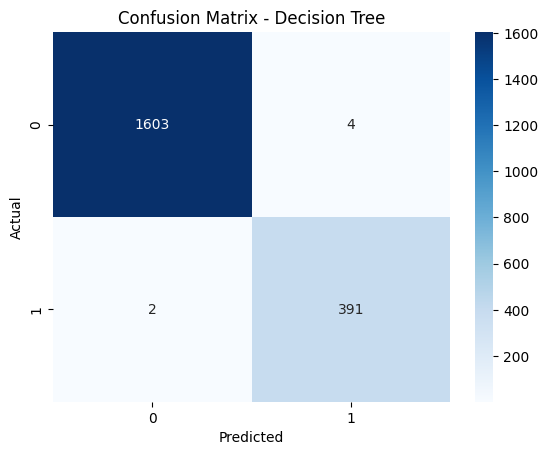

In [21]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_logreg_class = (y_pred_logreg > 0.5).astype(int)
y_pred_dtree_class = (y_pred_dtree > 0.5).astype(int)

print("\n--- Logistic Regression Evaluation ---")
print(classification_report(y_test, y_pred_logreg_class))
cm_logreg = confusion_matrix(y_test, y_pred_logreg_class)
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("\n--- Decision Tree Evaluation ---")
print(classification_report(y_test, y_pred_dtree_class))
cm_dtree = confusion_matrix(y_test, y_pred_dtree_class)
sns.heatmap(cm_dtree, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


**4 Reflexión Crítica**

**• ¿Qué desafíos enfrentaste al trabajar con los datos proporcionados?**

El principal desafío, según el código, fue el preprocesamiento de los datos.  Se tuvo que lidiar con la conversión de datos categóricos (género y geografía) a numéricos, la imputación de valores faltantes (usando la media para las variables numéricas) y la normalización de las variables numéricas usando `MinMaxScaler`.  No se menciona explícitamente, pero es probable que el desbalanceo de clases en la variable objetivo ("Exited") haya sido otro desafío, resuelto mediante SMOTE.  También la selección de las variables predictoras fue un paso crítico, donde se excluye 'Surname', pero no se justifica la decisión explícitamente.  La evaluación de la correlación entre variables es importante para decisiones de ingeniería de características, pero el análisis realizado en el código solo incluye una interpretación textual simple de los coeficientes de correlación.

**• ¿Qué mejorarías en el proceso de preprocesamiento de datos?**

1. **Análisis más profundo de valores faltantes:** En lugar de simplemente imputar la media, se podría explorar la razón de los valores faltantes.  Dependiendo de la variable y la cantidad de valores perdidos, otras técnicas de imputación como k-NN o incluso modelos de regresión podrían ser más apropiadas.  Si hay muchos valores faltantes, considerar la eliminación de la variable, si es posible.

2. **Tratamiento más robusto de *outliers*:** El código no incluye un análisis explícito de *outliers*.  Se deben identificar e investigar estos valores atípicos para determinar si deben eliminarse, transformarse (p. ej., usando transformaciones logarítmicas o Box-Cox) o si son datos válidos.

3. **Ingeniería de características:** Explorar la creación de nuevas variables a partir de las existentes.  Por ejemplo, combinar variables o crear variables binarias que representen relaciones más complejas entre las variables.

4. **Justificación de la exclusión de variables:**  El código excluye la variable "Surname" sin explicación.  Es importante justificar estas decisiones y evaluar el impacto de la eliminación.

5. **Escalamiento de características más adecuado:**  Si bien MinMaxScaler es una opción, se podría experimentar con otras técnicas de escalamiento, como StandardScaler, para ver si mejoran el rendimiento del modelo.  La decisión debe estar motivada por el conocimiento de los datos y los algoritmos de machine learning utilizados.

**• Si pudieras recolectar más datos, ¿qué variables adicionales serían útiles para mejorar el modelo de clasificación?**

Variables que podrían aportar información relevante para el modelo:

* **Frecuencia de uso de servicios:**  Número de transacciones mensuales, uso de la banca en línea, etc.
* **Satisfacción del cliente:** Resultados de encuestas de satisfacción, quejas presentadas, etc.
* **Información financiera adicional:**  Nivel de ingresos, deudas, inversiones, etc.
* **Datos demográficos adicionales:**  Estado civil, nivel de educación, etc.
* **Interacciones con el soporte técnico:**  Número de llamadas al servicio al cliente, tiempo de resolución de problemas, etc.
* **Información sobre productos y servicios utilizados:** Tipos de productos financieros que utilizan, saldo medio de las cuentas, etc.


**• ¿Cómo asegurarías que el modelo generalice bien y no esté sobreajustado?**

1. **Validación cruzada:** Implementar *k-fold cross-validation* para obtener una estimación más robusta del rendimiento del modelo.

2. **Regularización:** Utilizar técnicas de regularización como L1 o L2 para reducir la complejidad del modelo y evitar sobreajuste.

3. **Controlar la complejidad del modelo:**  Si se usan árboles de decisión, limitar la profundidad del árbol.  Si se usa una red neuronal, reducir el número de capas o neuronas.

4. **Conjunto de validación separado:**  Además del conjunto de prueba, usar un conjunto de validación para ajustar los hiperparámetros del modelo.  Esto ayuda a evitar el ajuste fino del modelo con el conjunto de prueba.

5. **Simplificar el preprocesamiento:**  Evitar pasos de preprocesamiento demasiado agresivos que puedan quitar información importante.  Por ejemplo, la elección de escalar los datos depende del algoritmo empleado.

**• ¿Qué impacto tuvo el desbalanceo de clases en la precisión de tu modelo? ¿Cómo se resolvió con SMOTE?**

El desbalanceo de clases hace que el modelo se incline a predecir la clase mayoritaria.  SMOTE crea ejemplos sintéticos para la clase minoritaria, mejorando el balance entre clases y permitiendo que el modelo aprenda patrones de la clase minoritaria, lo que aumenta la precisión para la clase minoritaria.

**• ¿Cómo detectarías y manejarías el overfitting en un modelo de Machine Learning?**

Como ya se describió anteriormente, la detección implica comparar el desempeño en el conjunto de entrenamiento con el de prueba.  La gestión implica las técnicas antes mencionadas (validación cruzada, regularización, control de la complejidad del modelo, conjunto de validación, entre otros).

En resumen, el código proporciona un punto de partida pero se puede mejorar significativamente el análisis de datos y el modelado mediante un análisis más exhaustivo del problema y explorando las diferentes técnicas de preprocesamiento, ingeniería de características y validación.
